In [1]:
import pandas as pd
from sklearn.metrics import r2_score
import plotly.graph_objects as go
import numpy as np
from prophet import Prophet
from prophet.plot import plot_plotly, plot_forecast_component_plotly
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [3]:
bike_test=pd.read_csv('bike_test.csv', parse_dates=['dteday'])
bike_train=pd.read_csv('bike_train.csv', parse_dates=['dteday'])

c:\Users\Gerardo\Documents\Henry\Proyecto-Grupal\venv\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '20/05/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Gerardo\Documents\Henry\Proyecto-Grupal\venv\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '21/05/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Gerardo\Documents\Henry\Proyecto-Grupal\venv\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '22/05/2012' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
c:\Users\Gerardo\Documents\Henry\Proyecto-Grupal\venv\lib\site-packages\p

In [4]:
bike_test.head()

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0    12000 2012-05-20       2   1     5   4        0        0           0   
1    12001 2012-05-20       2   1     5   5        0        0           0   
2    12002 2012-05-20       2   1     5   6        0        0           0   
3    12003 2012-05-20       2   1     5   7        0        0           0   
4    12004 2012-05-20       2   1     5   8        0        0           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  
0           1  0.52  0.5000  0.68     0.0896       2          14  
1           1  0.50  0.4848  0.72     0.1045       1           7  
2           1  0.50  0.4848  0.63     0.1343       4          21  
3           1  0.52  0.5000  0.68     0.1940      35          55  
4           1  0.56  0.5303  0.56     0.1642      51         120

In [5]:
bike_train.head()

instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   
2        3 2011-01-01       1   0     1   2        0        6           0   
3        4 2011-01-01       1   0     1   3        0        6           0   
4        5 2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1

In [6]:
bike_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11999 entries, 0 to 11998
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     11999 non-null  int64         
 1   dteday      11999 non-null  datetime64[ns]
 2   season      11999 non-null  int64         
 3   yr          11999 non-null  int64         
 4   mnth        11999 non-null  int64         
 5   hr          11999 non-null  int64         
 6   holiday     11999 non-null  int64         
 7   weekday     11999 non-null  int64         
 8   workingday  11999 non-null  int64         
 9   weathersit  11999 non-null  int64         
 10  temp        11999 non-null  float64       
 11  atemp       11999 non-null  float64       
 12  hum         11999 non-null  float64       
 13  windspeed   11999 non-null  float64       
 14  casual      11999 non-null  int64         
 15  registered  11999 non-null  int64         
 16  cnt         11999 non-

In [8]:
bike_train.describe()

instant        season            yr          mnth            hr  \
count  11999.000000  11999.000000  11999.000000  11999.000000  11999.000000   
mean    6000.000000      2.210684      0.279523      5.530294     11.556630   
std     3463.957275      1.088798      0.448784      3.433005      6.911891   
min        1.000000      1.000000      0.000000      1.000000      0.000000   
25%     3000.500000      1.000000      0.000000      3.000000      6.000000   
50%     6000.000000      2.000000      0.000000      5.000000     12.000000   
75%     8999.500000      3.000000      1.000000      8.000000     18.000000   
max    11999.000000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  11999.000000  11999.000000  11999.000000  11999.000000  11999.000000   
mean       0.027752      3.009334      0.684057      1.435036      0.465704   
std        0.164269      2.005264      0.464910      0.650894      0.188576   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.320000   
50%        0.000000      3.000000      1.000000      1.000000      0.460000   
75%        0.000000      5.000000      1.000000      2.000000      0.620000   
max        1.000000      6.000000      1.000000      4.000000      0.960000   

              atemp           hum     windspeed        casual    registered  \
count  11999.000000  11999.000000  11999.000000  11999.000000  11999.000000   
mean       0.448888      0.625770      0.196433     30.049837    128.545129   
std        0.169633      0.200637      0.125394     43.596915    124.692750   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.303000      0.470000      0.104500      3.000000     29.000000   
50%        0.454500      0.620000      0.194000     13.000000     98.000000   
75%        0.590900      0.790000      0.283600     39.000000    185.000000   
max        1.000000      1.000000      0.850700    367.000000    770.000000   

                cnt  
count  11999.000000  
mean     158.594966  
std      151.392952  
min        1.000000  
25%       34.000000  
50%      118.000000  
75%      232.000000  
max      957.000000

In [10]:
bike_train.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

NameError: name 'plt' is not defined

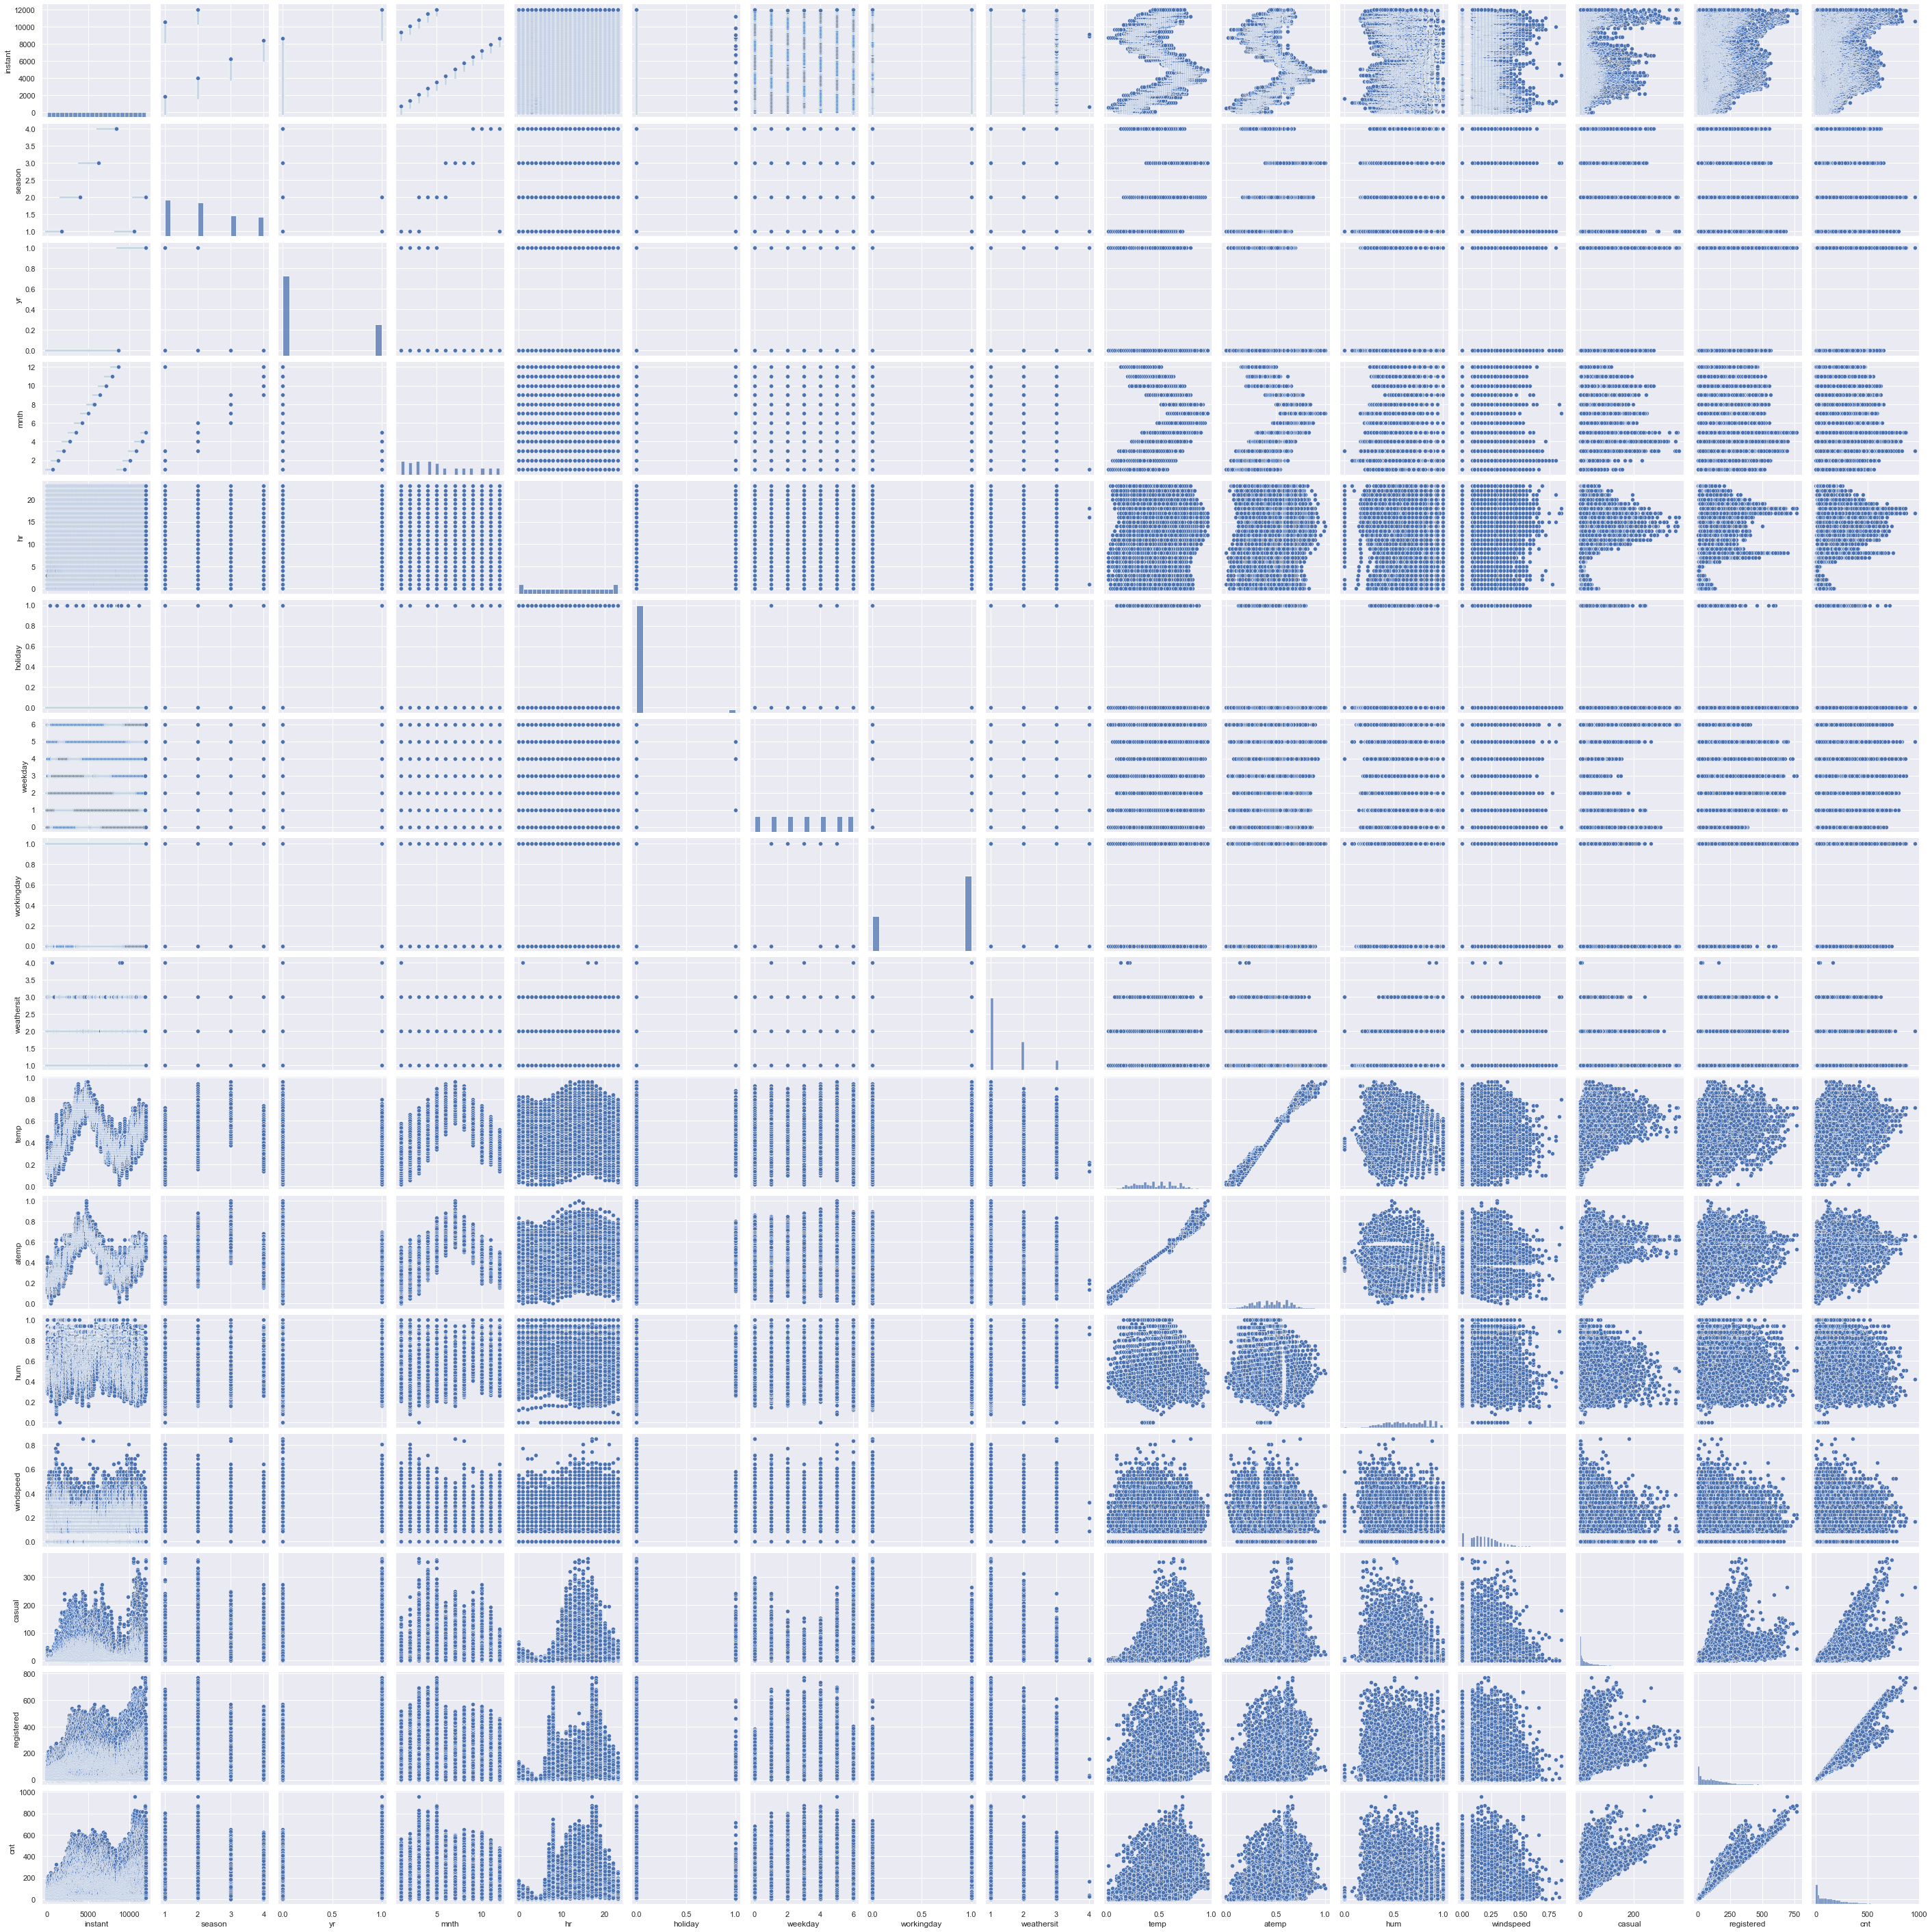

In [14]:
sns.pairplot(bike_train)
plt.show()

In [7]:
bike_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5380 entries, 0 to 5379
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     5380 non-null   int64         
 1   dteday      5380 non-null   datetime64[ns]
 2   season      5380 non-null   int64         
 3   yr          5380 non-null   int64         
 4   mnth        5380 non-null   int64         
 5   hr          5380 non-null   int64         
 6   holiday     5380 non-null   int64         
 7   weekday     5380 non-null   int64         
 8   workingday  5380 non-null   int64         
 9   weathersit  5380 non-null   int64         
 10  temp        5380 non-null   float64       
 11  atemp       5380 non-null   float64       
 12  hum         5380 non-null   float64       
 13  windspeed   5380 non-null   float64       
 14  casual      5380 non-null   int64         
 15  registered  5380 non-null   int64         
dtypes: datetime64[ns](1), fl

In [9]:
bike_test.describe()

instant       season      yr         mnth           hr  \
count   5380.000000  5380.000000  5380.0  5380.000000  5380.000000   
mean   14689.500000     3.150558     1.0     8.784758    11.524721   
std     1553.216555     0.839184     0.0     2.145166     6.920601   
min    12000.000000     1.000000     1.0     5.000000     0.000000   
25%    13344.750000     3.000000     1.0     7.000000     6.000000   
50%    14689.500000     3.000000     1.0     9.000000    12.000000   
75%    16034.250000     4.000000     1.0    11.000000    18.000000   
max    17379.000000     4.000000     1.0    12.000000    23.000000   

           holiday      weekday  workingday   weathersit         temp  \
count  5380.000000  5380.000000  5380.00000  5380.000000  5380.000000   
mean      0.031041     2.991078     0.67974     1.403532     0.566758   
std       0.173444     2.007032     0.46662     0.612343     0.182800   
min       0.000000     0.000000     0.00000     1.000000     0.140000   
25%       0.000000     1.000000     0.00000     1.000000     0.400000   
50%       0.000000     3.000000     1.00000     1.000000     0.600000   
75%       0.000000     5.000000     1.00000     2.000000     0.700000   
max       1.000000     6.000000     1.00000     3.000000     1.000000   

             atemp          hum    windspeed       casual   registered  
count  5380.000000  5380.000000  5380.000000  5380.000000  5380.000000  
mean      0.535741     0.630483     0.175968    48.224721   210.083457  
std       0.161300     0.174493     0.113988    58.190764   186.387877  
min       0.151500     0.160000     0.000000     0.000000     0.000000  
25%       0.409100     0.490000     0.104500     6.000000    51.000000  
50%       0.575800     0.640000     0.164200    28.000000   175.000000  
75%       0.666700     0.780000     0.253700    69.000000   304.000000  
max       0.924200     1.000000     0.656700   362.000000   886.000000

In [11]:
bike_test.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
dtype: int64

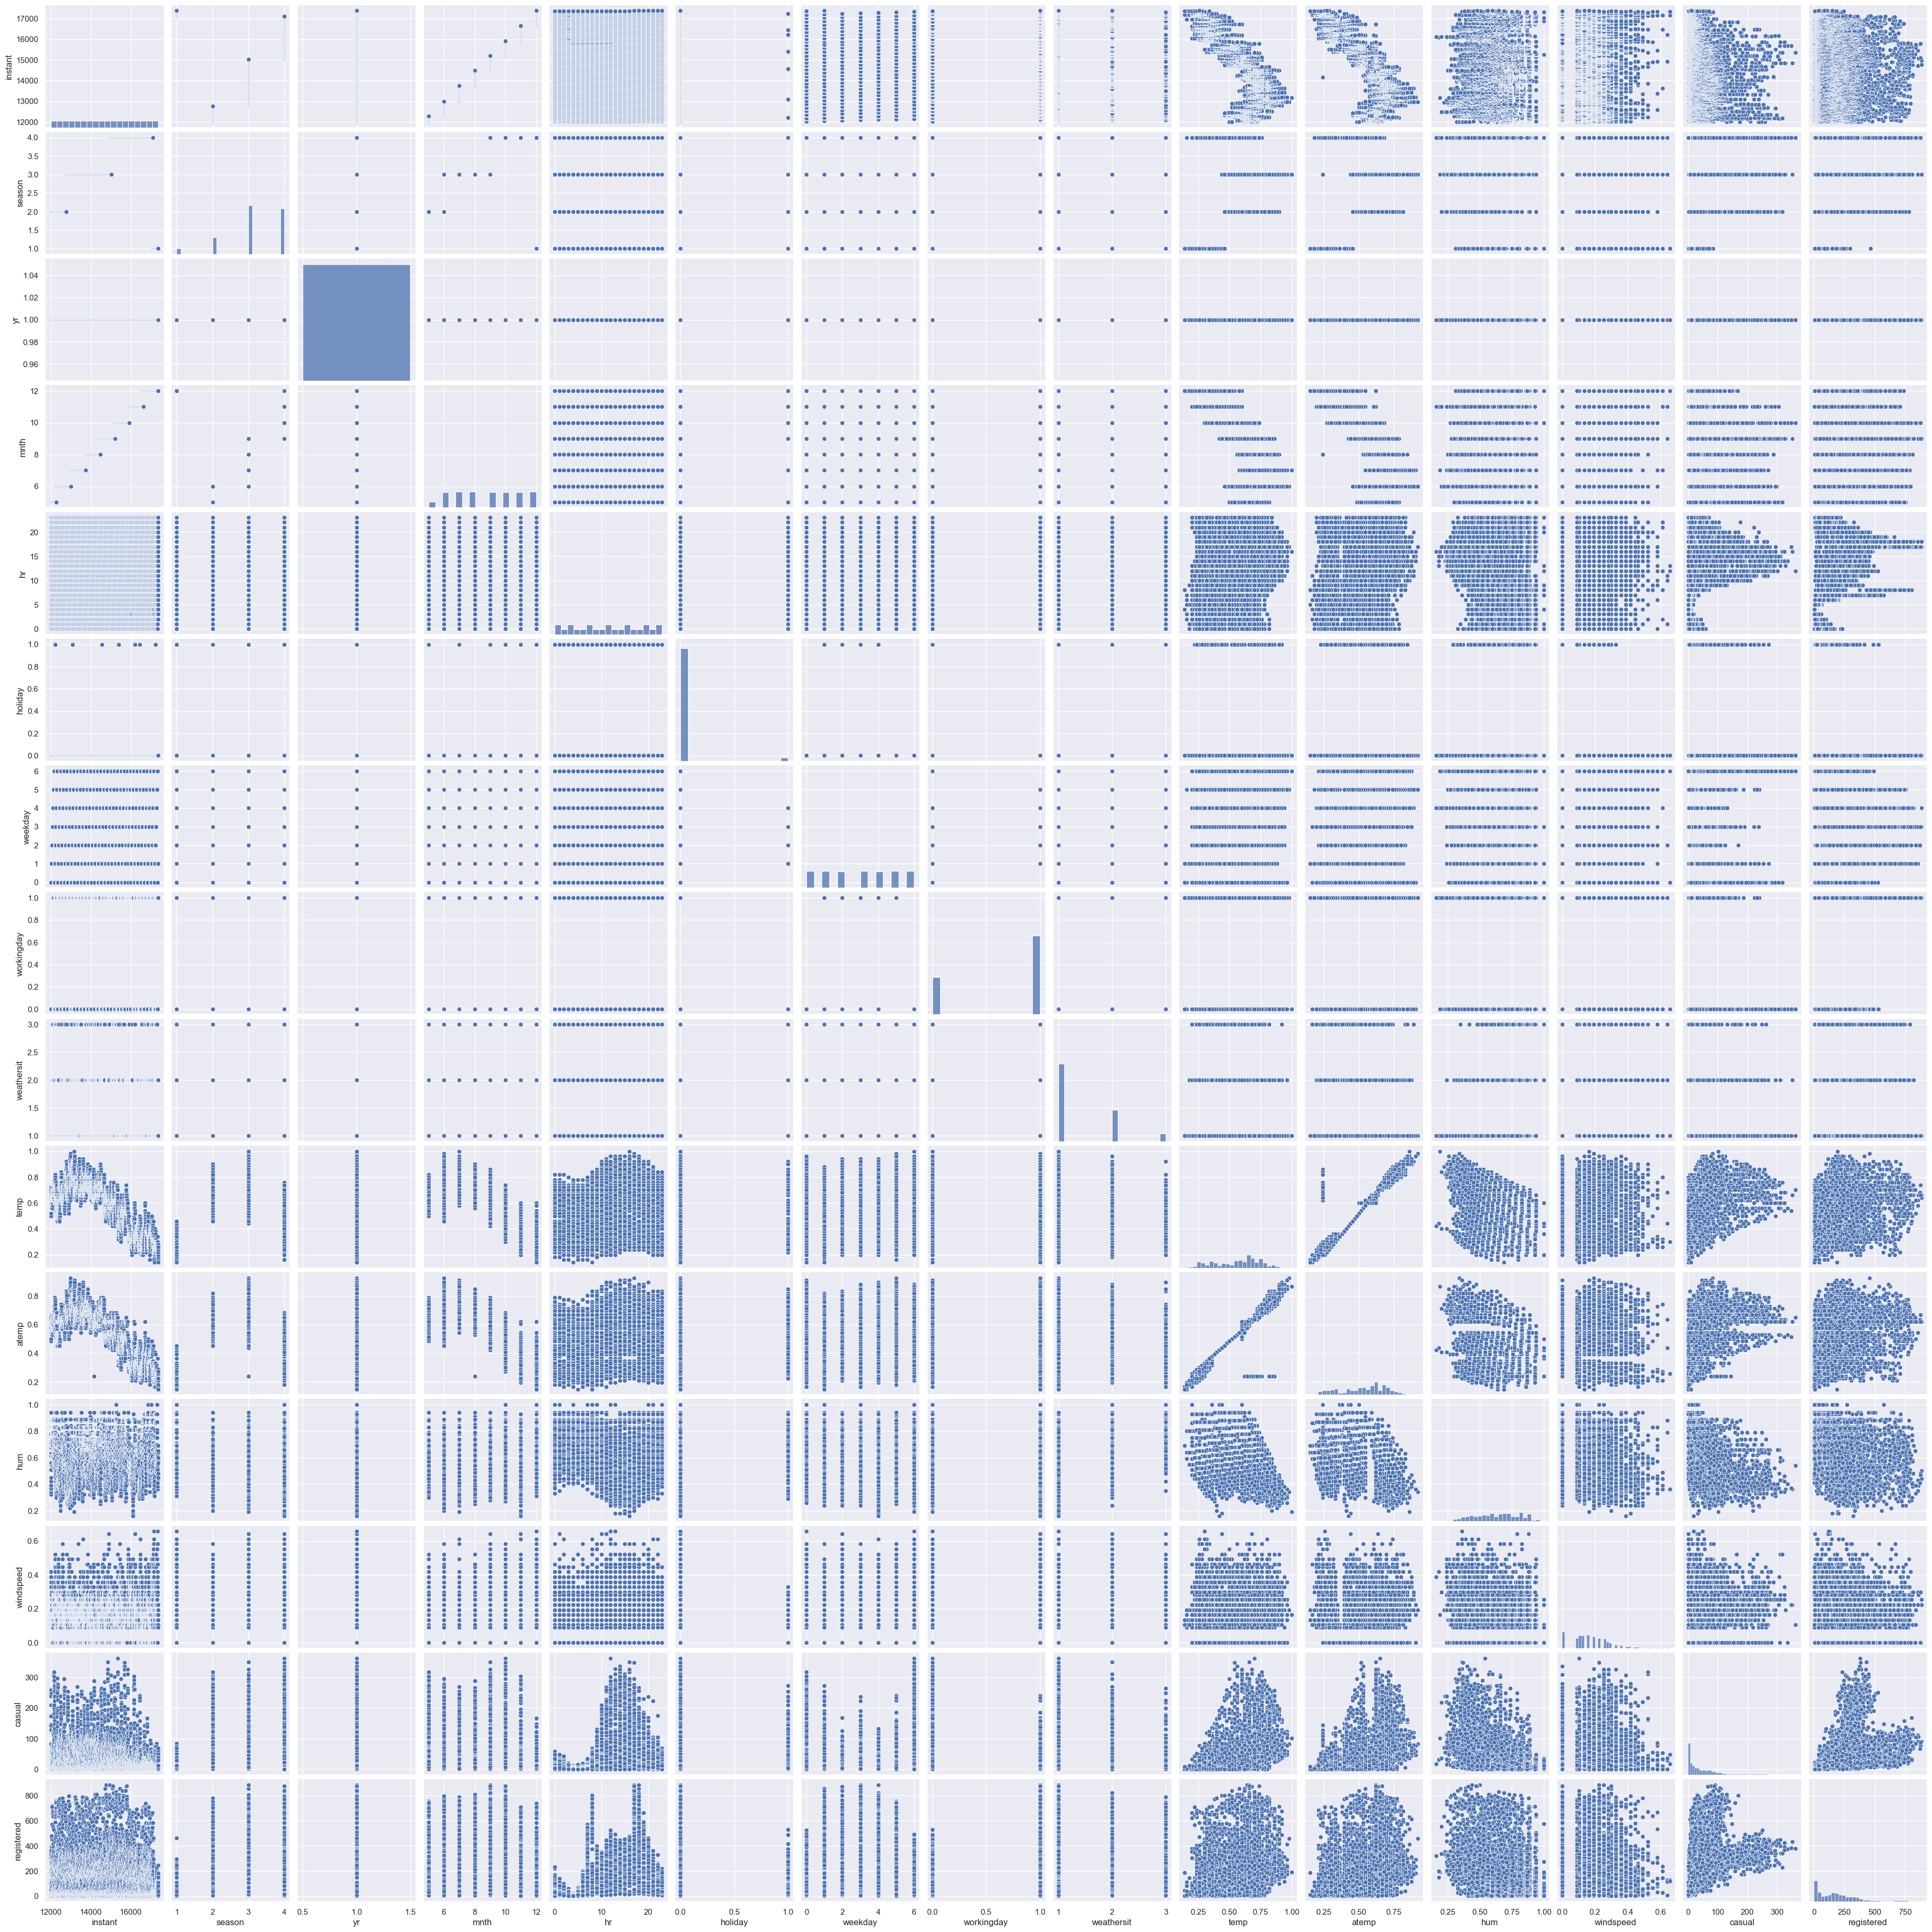

In [16]:
sns.pairplot(bike_test)
plt.show()

# Modelo Simple Linear Regression

In [23]:
X=bike_train.iloc[:,-2:-1].values
y=bike_train.iloc[:,-1].values
#dividir el set en entrenamiento y prueba
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=0)

In [24]:

from sklearn.linear_model import LinearRegression as LR
regresion=LR()
regresion.fit(X_train, y_train)


LinearRegression()

In [25]:
y_pred=regresion.predict(X_test)

In [26]:
y_pred_train=regresion.predict(X_train)
RMSE = mean_squared_error(y_train, y_pred_train, squared=False)

RMSE

37.62330689453511

In [27]:
RMSE = mean_squared_error(y_test, y_pred, squared=False)

RMSE

37.882854258105425

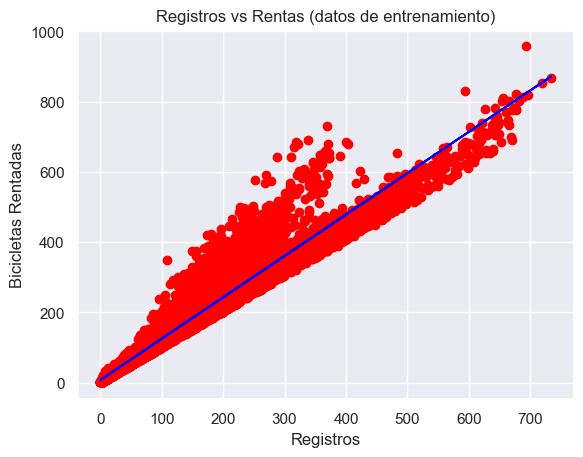

In [28]:
plt.scatter(X_train, y_train, color = "red")
plt.plot(X_train, regresion.predict(X_train), color='blue')
plt.title('Registros vs Rentas (datos de entrenamiento)')
plt.xlabel('Registros')
plt.ylabel('Bicicletas Rentadas')
plt.show()

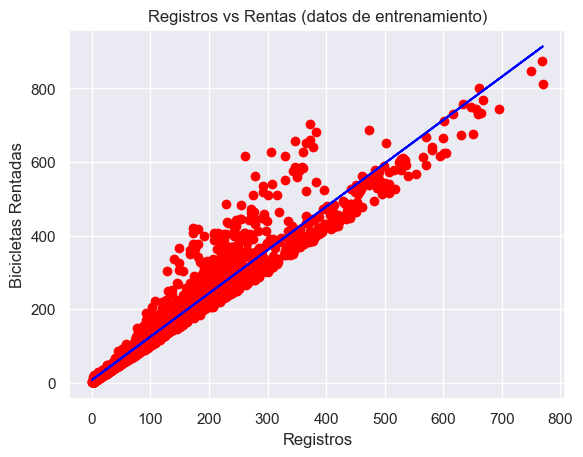

In [29]:
plt.scatter(X_test, y_test, color = "red")
plt.plot(X_test, y_pred, color='blue')
plt.title('Registros vs Rentas (datos de entrenamiento)')
plt.xlabel('Registros')
plt.ylabel('Bicicletas Rentadas')
plt.show()

In [30]:
X_final=bike_test.iloc[:,15:16].values

In [31]:
pred=regresion.predict(X_final)

In [33]:
df = pd.DataFrame(pred, columns = ['pred'])

In [37]:
df.to_csv('Gerardo3070.csv', index=False)